In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [2]:
!curl -O https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 80876  100 80876    0     0   203k      0 --:--:-- --:--:-- --:--:--  204k


In this dataset our desired target for classification task will be converted variable - has the client signed up to the platform or not.

### Data preparation
- Check if the missing values are presented in the features.
- If there are missing values:
    - For caterogiral features, replace them with 'NA'
    - For numerical features, replace with with 0.0

- Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. 
- Use train_test_split function for that with random_state=1

In [3]:
df = pd.read_csv('course_lead_scoring.csv')

In [4]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
# Check if the missing values are presented in the features.
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
cat = list(df.select_dtypes(exclude='number').columns)

In [7]:
# For caterogiral features, replace them with 'NA'
df[cat] = df.select_dtypes(exclude='number').fillna('NA')

In [8]:
# df

In [9]:
num = list(df.select_dtypes(exclude='object').columns)

In [10]:
# For numerical features, replace with with 0.0
df[num] = df.select_dtypes(exclude='object').fillna(0.0)

In [11]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [16]:
df_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
462,events,manufacturing,2,95543.0,unemployed,europe,3,0.78,0
135,referral,NA,1,54924.0,student,south_america,6,0.39,1
117,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22,0
1051,paid_ads,other,2,34600.0,employed,south_america,2,0.31,0
945,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01,0
...,...,...,...,...,...,...,...,...,...
39,NA,other,5,67314.0,NA,europe,2,0.87,1
1261,events,education,6,63996.0,NA,australia,4,0.92,1
595,organic_search,finance,1,73702.0,unemployed,north_america,2,0.55,0
1329,events,technology,1,93341.0,student,middle_east,4,0.99,0


In [17]:
# Resetting index of our train/val/test data
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Isolating our target variables for trrain/val/test and turning them into numpy arrays
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

# Dropping the target variable from the dataset
df_train = df_train.drop('converted', axis=1)
df_val = df_val.drop('converted', axis=1)
df_test = df_test.drop('converted', axis=1)

In [18]:
df_full_train.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [19]:
df_full_train.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [20]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
categorical = ['lead_source', 'industry', 'employment_status', 'location',]

### Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
- Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

- Which numerical variable (among the following 4) has the highest AUC?
```
- lead_score
- number_of_courses_viewed
- interaction_count
- annual_income
```

In [21]:
from sklearn.metrics import auc, roc_auc_score

In [22]:
len(df_train), len(y_train)

(876, 876)

In [23]:
# y_train

In [24]:
# df_train['number_of_courses_viewed'].values

In [25]:
auc_num_course_viewed = roc_auc_score(y_train, df_train['number_of_courses_viewed'].values)
auc_num_course_viewed

0.7635680590007088

In [26]:
auc_lead_score = roc_auc_score(y_train, df_train['lead_score'].values)
auc_lead_score

0.6144993577250176

In [27]:
auc_annual_income = roc_auc_score(y_train, df_train['annual_income'].values)
auc_annual_income

0.5519578313253012

In [28]:
auc_interaction_count = roc_auc_score(y_train, df_train['interaction_count'].values)
auc_interaction_count

0.738270176293409

`number_of_courses_viewed` has the highest AUC (`0.7635680590007088`) among the other numerical variables 

## Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```
- What's the AUC of this model on the validation dataset? (round to 3 digits)
```
- 0.32
- 0.52
- 0.72
- 0.92
```

In [29]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [30]:
train_dicts = df_train[categorical+numerical].to_dict(orient='records')

In [31]:
dv = DictVectorizer(sparse=False)

In [32]:
X_train = dv.fit_transform(train_dicts)

In [33]:
model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000)

In [34]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [35]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')

In [36]:
X_val = dv.transform(val_dicts)

In [37]:
y_pred = model.predict_proba(X_val)[:, 1]

In [38]:
auc = round(roc_auc_score(y_val, y_pred), 3)
auc

0.92

The AUC is `0.92` on the validation dataset

### Question 3: Precision and Recall
Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

- At which threshold precision and recall curves intersect?
```
- 0.145
- 0.345
- 0.545
- 0.745
```

In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
# Calculate precision and recall for each threshold
thresholds = np.arange(0.0, 1.01, 0.01)  # 0.0 to 1.0 with step 0.01
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    # Calculate precision and recall
    precision = (tp / (tp + fp)).round(2) if (tp + fp) > 0 else 0
    recall = (tp / (tp + fn)).round(2) if (tp + fn) > 0 else 0
    
    scores.append((t, precision, recall))

In [41]:
# scores

In [42]:
# Create DataFrame
df_scores = pd.DataFrame(scores, columns=['threshold', 'precision', 'recall'])
# df_scores

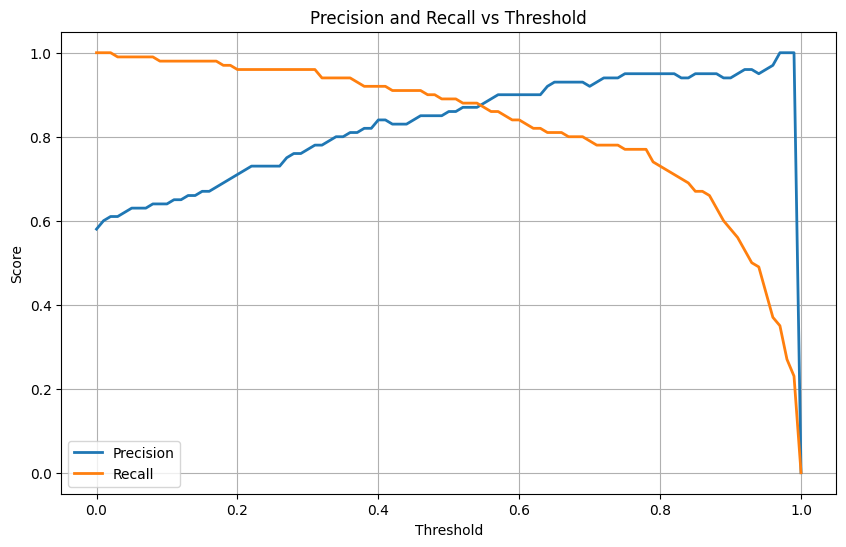

In [43]:
# Plot precision and recall curves
plt.figure(figsize=(10, 6))
plt.plot(df_scores.threshold, df_scores.precision, label='Precision', linewidth=2)
plt.plot(df_scores.threshold, df_scores.recall, label='Recall', linewidth=2)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
df_scores[(df_scores['threshold'] >= 0.5) & (df_scores['threshold'] < 0.8)]

,threshold,precision,recall
50,0.50,0.86,0.89
51,0.51,0.86,0.89
52,0.52,0.87,0.88
53,0.53,0.87,0.88
54,0.54,0.87,0.88
55,0.55,0.88,0.87
56,0.56,0.89,0.86
57,0.57,0.90,0.86
58,0.58,0.90,0.85
59,0.59,0.90,0.84


As we can see from the plot and the table at threshold `0.545` precision and recall intersect

### Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = \frac{2 \cdot P \cdot R}{P + R}$$

Where P is precision and R is recall.

- Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

- At which threshold F1 is maximal?
```
0.14
0.34
0.54
0.74
```

In [45]:
# Calculate precision and recall for each threshold
thresholds = np.arange(0.0, 1.01, 0.01)  # 0.0 to 1.0 with step 0.01
f1_scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    # Calculate precision and recall
    precision = (tp / (tp + fp)) if (tp + fp) > 0 else 0
    recall = (tp / (tp + fn)) if (tp + fn) > 0 else 0
    f1 = ((2 * precision * recall) / (precision + recall)) if (precision + recall) > 0 else 0
    f1_scores.append(f1)
    scores.append((t, precision, recall, f1))

In [46]:
max(f1_scores)

np.float64(0.877906976744186)

In [47]:
df_scores = pd.DataFrame(scores, columns=['threshold', 'precision', 'recall', 'f1'])

# Find exact match
result = df_scores[df_scores['f1'] == max(f1_scores)]

In [48]:
result

,threshold,precision,recall,f1
153,0.52,0.872832,0.883041,0.877907


The closest answer is `0.54`

### Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

```python
KFold(n_splits=5, shuffle=True, random_state=1)
```

- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

- How large is standard deviation of the scores across different folds?
```
- 0.0001
- 0.006
- 0.06
- 0.36
```

In [49]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [50]:
def train(df_train, y_train, C=1.0):

    # Creating a Dictionary Vectorizer
    dv = DictVectorizer(sparse=False)
    
    # Turning our Training set into list of dictionaries
    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    
    # Fitting and Transforming our list of dictionaries into matrix
    X_train = dv.fit_transform(train_dict)
    
    # Initiating our logistic regression model
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    
    # Fitting our model to train and target matrices
    model.fit(X_train, y_train)

    return dv, model

In [51]:
def predict(df, dv, model):
    
    # Turning our dataset set into list of dictionaries
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    # Transforming our list of dictionaries into matrix
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [52]:
scores = []
n_splits=5
C=1.0
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for train_idx, val_idx in tqdm(kfold.split(df_full_train), total=n_splits):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    # print(auc)
    scores.append(auc)
print(f"C=({C}) | AUC=({np.mean(scores)}) | STD=({np.std(scores)})")

  0%|          | 0/5 [00:00<?, ?it/s]

C=(1.0) | AUC=(0.8221089148573075) | STD=(0.03580711942905165)


Closest one is `0.06`

### Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: `[0.000001, 0.001, 1]`
- Initialize KFold with the same parameters as previously
- Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

- Which C leads to the best mean score?
```
- 0.000001
- 0.001
- 1
```
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [53]:
n_splits = 5
C = [0.000001, 0.001, 1]

for c in tqdm(C):
    scores = []
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.converted.values
        y_val = df_val.converted.values
    
        dv, model = train(df_train, y_train, C=c)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        # print(auc)
        scores.append(auc)
    print(f"C=({c}) | AUC=({np.mean(scores):.3f}) | STD=({np.std(scores):.3f})")

  0%|          | 0/3 [00:00<?, ?it/s]

C=(1e-06) | AUC=(0.560) | STD=(0.024)
C=(0.001) | AUC=(0.867) | STD=(0.029)
C=(1) | AUC=(0.822) | STD=(0.036)


`0.001` has the best mean score